In [28]:
import tensorflow as tf
tf.__version__
tf.config.experimental.enable_op_determinism()
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [29]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [30]:
def plot_columns(df):
    colors = plt.cm.tab20(range(df.shape[1]))  

    for i, column in enumerate(df.columns):
        color = colors[i % 24]

        plt.figure()
        plt.plot(df.index, df[column], color=color)
        plt.xlabel('Tempo')
        plt.ylabel('Valor')
        plt.title(column)

    plt.show()

In [31]:
def plot_correlation_matrix(df):
    correlation_matrix = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Matrix Heatmap")
    plt.show()

In [32]:
tf.keras.backend.clear_session()

In [33]:
subject = 'Paraná - Consumo de Cimento (t)'
start_index = 0
split_index = 179
window_size = 36
train_split = split_index + 1 - 12

In [34]:
data = pd.read_csv('2003_raw_Paraná_input.csv')
pd.set_option('display.max_columns', None)
data = data.replace(-1.0, np.nan)
data

,data,Paraná - PIB - Per Capita,Paraná - PIB - Preços de Mercado,Paraná - PIB - Estadual,Paraná - PIB - Construção Civil,Paraná - População,Paraná - INCC (%),Paraná - IPCA - Variação mensal durante o Plano Real (%),Paraná - IGP-DI,Paraná - Taxa Selic (%),Paraná - IDH - Longevidade,Paraná - IDH - Renda,Paraná - IDH - Educação,Paraná - NFSP - Fluxo Mensal (Milhões de reais),Paraná - Estoque liquido de capital fixo - (R$),Paraná - Desemprego,Paraná - Produção de Cimento (t),Paraná - Valor,Paraná - Consumo de Cimento (t)
0,2003-01-01,1.208764e+07,6.362768e+06,1.233684,8.105918e+06,9798006.0,1.70,12.53,2.70,0.082293,0.77,0.66,0.67,3.46,6.098524e+06,NaN,NaN,0.290,189804.0
1,2003-02-01,1.208764e+07,6.362768e+06,1.233684,8.105918e+06,9798006.0,1.51,2.25,2.17,0.088771,0.77,0.66,0.67,3.59,6.172460e+06,NaN,20313.0,0.320,174713.0
2,2003-03-01,1.208764e+07,6.362768e+06,1.233684,8.105918e+06,9798006.0,1.39,3.86,1.59,0.090733,0.77,0.66,0.67,3.84,6.172460e+06,NaN,55352.0,0.320,180801.0
3,2003-04-01,1.208764e+07,6.362768e+06,1.233684,8.105918e+06,9798006.0,1.38,5.13,1.66,0.092749,0.77,0.66,0.67,3.95,6.172460e+06,NaN,107469.0,0.320,180172.0
4,2003-05-01,1.208764e+07,6.362768e+06,1.233684,8.105918e+06,9798006.0,0.90,6.15,0.41,0.092758,0.77,0.66,0.67,4.06,6.172460e+06,NaN,49219.0,0.320,185597.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,2019-08-01,1.889402e+07,3.188068e+07,1.664827,9.685503e+06,11348937.0,0.58,2.42,-0.01,0.024620,0.77,0.66,0.67,0.69,7.827728e+06,NaN,263867.0,0.435,356169.0
200,2019-09-01,1.889402e+07,3.188068e+07,1.664827,9.685503e+06,11348937.0,0.42,2.54,-0.51,0.022751,0.77,0.66,0.67,0.62,7.827728e+06,NaN,NaN,0.450,316188.0
201,2019-10-01,1.889402e+07,3.188068e+07,1.664827,9.685503e+06,11348937.0,0.46,2.49,0.50,0.022035,0.77,0.66,0.67,0.59,7.827728e+06,NaN,53007.0,0.450,346214.0
202,2019-11-01,1.889402e+07,3.188068e+07,1.664827,9.685503e+06,11348937.0,0.18,2.60,0.55,0.020790,0.77,0.66,0.67,0.57,7.827728e+06,NaN,18644.0,0.450,323401.0


In [35]:
# Shift para prever futuro e não presente
target_data = data[subject].shift(-24)
target_data = target_data/1000
target_data

0      172.044
1      188.841
2      200.253
3      188.916
4      184.994
        ...   
199        NaN
200        NaN
201        NaN
202        NaN
203        NaN
Name: Paraná - Consumo de Cimento (t), Length: 204, dtype: float64

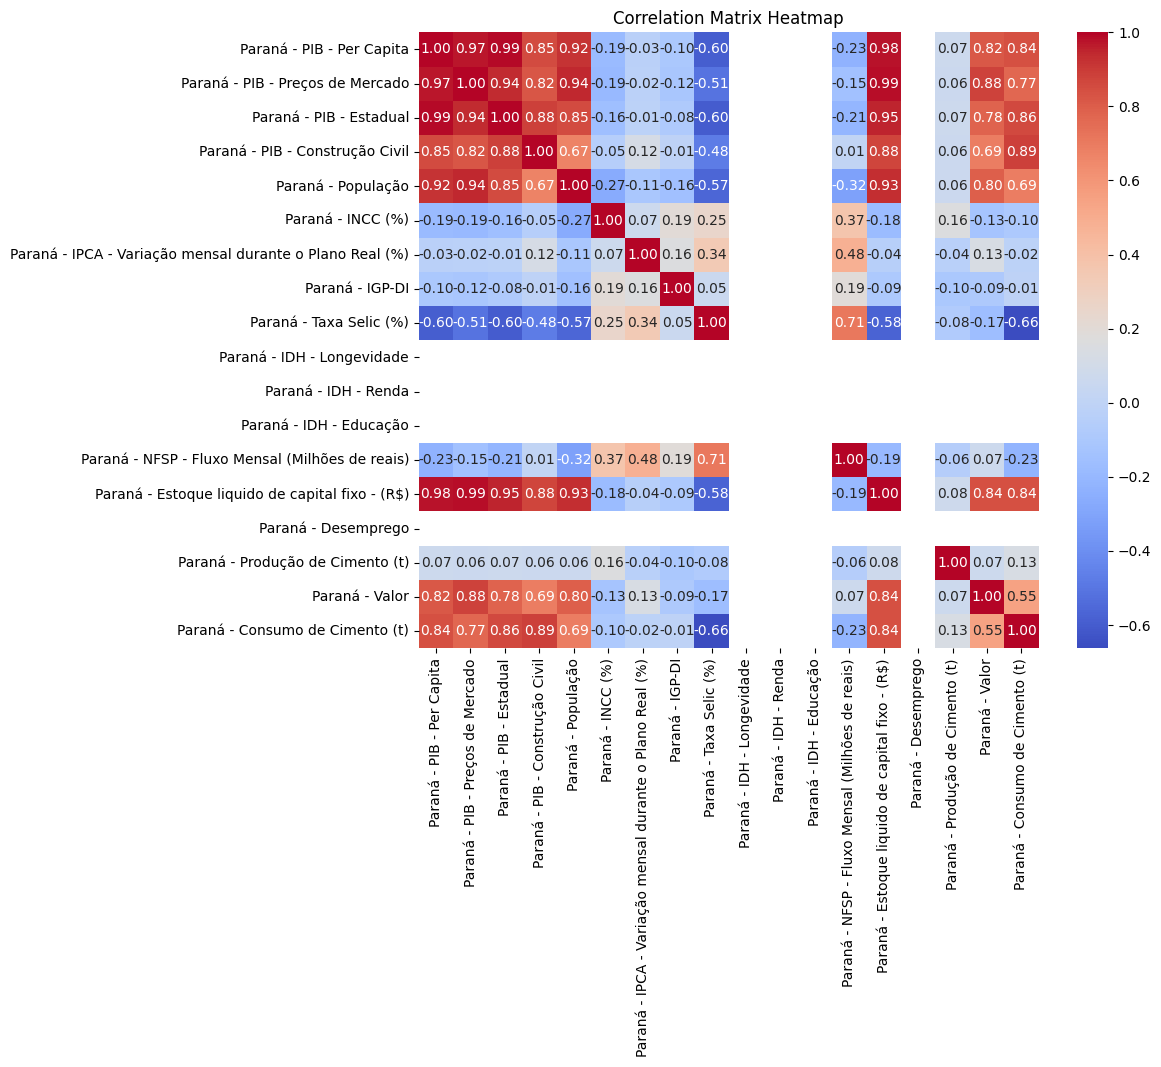

In [36]:
plot_data = data.iloc[:split_index + 1,1:]
plot_correlation_matrix(plot_data)

In [37]:
input_data = data.fillna(0.0).iloc[:split_index + 1,1:-1]
mean = np.mean(input_data, axis=0)
stddev =  np.std(input_data, axis=0)
input_data = ((input_data - mean) /stddev)
input_data = input_data.fillna(0.0)
input_data

,Paraná - PIB - Per Capita,Paraná - PIB - Preços de Mercado,Paraná - PIB - Estadual,Paraná - PIB - Construção Civil,Paraná - População,Paraná - INCC (%),Paraná - IPCA - Variação mensal durante o Plano Real (%),Paraná - IGP-DI,Paraná - Taxa Selic (%),Paraná - IDH - Longevidade,Paraná - IDH - Renda,Paraná - IDH - Educação,Paraná - NFSP - Fluxo Mensal (Milhões de reais),Paraná - Estoque liquido de capital fixo - (R$),Paraná - Desemprego,Paraná - Produção de Cimento (t),Paraná - Valor
0,-1.681822,-1.351947,-1.641072,-0.456553,-1.743888,1.998868,4.052332,3.466715,2.303195,0.666667,0.0,0.0,3.108599,-1.539424,0.0,-0.470351,-1.524923
1,-1.681822,-1.351947,-1.641072,-0.456553,-1.743888,1.647487,-0.596188,2.630940,2.745235,0.666667,0.0,0.0,3.275709,-1.411460,0.0,-0.392306,-0.933532
2,-1.681822,-1.351947,-1.641072,-0.456553,-1.743888,1.425561,0.131839,1.716318,2.879123,0.666667,0.0,0.0,3.597074,-1.411460,0.0,-0.257680,-0.933532
3,-1.681822,-1.351947,-1.641072,-0.456553,-1.743888,1.407068,0.706121,1.826703,3.016721,0.666667,0.0,0.0,3.738475,-1.411460,0.0,-0.057439,-0.933532
4,-1.681822,-1.351947,-1.641072,-0.456553,-1.743888,0.519367,1.167355,-0.144465,3.017322,0.666667,0.0,0.0,3.879875,-1.411460,0.0,-0.281244,-0.933532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,1.247832,1.814264,1.028742,0.579173,1.660779,-0.590259,-0.966985,-1.264088,-0.729479,0.666667,0.0,0.0,-0.374997,1.441346,0.0,0.340436,1.333466
176,1.247832,1.814264,1.028742,0.579173,1.660779,-0.479297,-0.881068,-0.412544,-0.941281,0.666667,0.0,0.0,-0.439270,1.441346,0.0,-0.336225,0.643510
177,1.247832,1.814264,1.028742,0.579173,1.660779,-1.034110,-0.808718,0.186692,-1.140710,0.666667,0.0,0.0,-0.503543,1.441346,0.0,-0.131220,1.037770
178,1.247832,1.814264,1.028742,0.579173,1.660779,-0.571766,-0.614276,-0.633314,-1.226481,0.666667,0.0,0.0,-0.503543,1.441346,0.0,-0.389182,1.234900


In [38]:
# input para treinamento
train_input = input_data.iloc[start_index:train_split]
train_input

,Paraná - PIB - Per Capita,Paraná - PIB - Preços de Mercado,Paraná - PIB - Estadual,Paraná - PIB - Construção Civil,Paraná - População,Paraná - INCC (%),Paraná - IPCA - Variação mensal durante o Plano Real (%),Paraná - IGP-DI,Paraná - Taxa Selic (%),Paraná - IDH - Longevidade,Paraná - IDH - Renda,Paraná - IDH - Educação,Paraná - NFSP - Fluxo Mensal (Milhões de reais),Paraná - Estoque liquido de capital fixo - (R$),Paraná - Desemprego,Paraná - Produção de Cimento (t),Paraná - Valor
0,-1.681822,-1.351947,-1.641072,-0.456553,-1.743888,1.998868,4.052332,3.466715,2.303195,0.666667,0.0,0.0,3.108599,-1.539424,0.0,-0.470351,-1.524923
1,-1.681822,-1.351947,-1.641072,-0.456553,-1.743888,1.647487,-0.596188,2.630940,2.745235,0.666667,0.0,0.0,3.275709,-1.411460,0.0,-0.392306,-0.933532
2,-1.681822,-1.351947,-1.641072,-0.456553,-1.743888,1.425561,0.131839,1.716318,2.879123,0.666667,0.0,0.0,3.597074,-1.411460,0.0,-0.257680,-0.933532
3,-1.681822,-1.351947,-1.641072,-0.456553,-1.743888,1.407068,0.706121,1.826703,3.016721,0.666667,0.0,0.0,3.738475,-1.411460,0.0,-0.057439,-0.933532
4,-1.681822,-1.351947,-1.641072,-0.456553,-1.743888,0.519367,1.167355,-0.144465,3.017322,0.666667,0.0,0.0,3.879875,-1.411460,0.0,-0.281244,-0.933532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,1.290097,1.529867,1.157510,0.906301,1.472951,-0.238878,0.629248,-1.406012,0.272188,0.666667,0.0,0.0,0.794771,1.416222,0.0,-0.470351,1.826291
164,1.290097,1.529867,1.157510,0.906301,1.472951,-0.608753,0.837256,-0.112926,0.272188,0.666667,0.0,0.0,0.730498,1.416222,0.0,-0.470351,1.727726
165,1.290097,1.529867,1.157510,0.906301,1.472951,-0.534778,0.877953,-0.743700,0.272188,0.666667,0.0,0.0,0.743353,1.416222,0.0,-0.470351,1.660702
166,1.290097,1.529867,1.157510,0.906301,1.472951,-0.756703,1.000045,-0.586006,0.248413,0.666667,0.0,0.0,0.614807,1.416222,0.0,-0.470351,1.759267


In [39]:
# Alvo para treinamento
train_target = target_data.iloc[start_index:train_split]
train_target

0      172.044
1      188.841
2      200.253
3      188.916
4      184.994
        ...   
163    344.937
164    302.082
165    294.467
166    336.029
167    278.117
Name: Paraná - Consumo de Cimento (t), Length: 168, dtype: float64

In [40]:
def create_batches(t_input, t_target, window_size, start_from):
    
    X_batches = []
    y_batches = []

    train_input_values = t_input.values 

    for i in range(len(t_input) - window_size):
        
        X_window = train_input_values[i:i+window_size, :]
        y_target = t_target[start_from+i+window_size]

        X_batches.append(X_window)
        y_batches.append(y_target)

    return np.array(X_batches), np.array(y_batches)

In [41]:
reshaped_train, reshaped_target = create_batches(train_input, 
                                                 train_target, 
                                                 window_size, 
                                                 start_index)
reshaped_train.shape

(132, 36, 17)

In [42]:
# input para treinamento
test_input = input_data.iloc[train_split - window_size:split_index + 1]
test_input

,Paraná - PIB - Per Capita,Paraná - PIB - Preços de Mercado,Paraná - PIB - Estadual,Paraná - PIB - Construção Civil,Paraná - População,Paraná - INCC (%),Paraná - IPCA - Variação mensal durante o Plano Real (%),Paraná - IGP-DI,Paraná - Taxa Selic (%),Paraná - IDH - Longevidade,Paraná - IDH - Renda,Paraná - IDH - Educação,Paraná - NFSP - Fluxo Mensal (Milhões de reais),Paraná - Estoque liquido de capital fixo - (R$),Paraná - Desemprego,Paraná - Produção de Cimento (t),Paraná - Valor
132,1.473274,1.081356,1.553487,1.142527,1.082802,-0.960135,1.058830,0.297077,-0.755853,0.666667,0.0,0.0,-0.285015,0.834026,0.0,-0.268961,1.156048
133,1.473274,1.081356,1.553487,1.142527,1.082802,0.482379,-1.364912,-0.160234,-0.688658,0.666667,0.0,0.0,-0.349288,1.129318,0.0,-0.470351,0.998344
134,1.473274,1.081356,1.553487,1.142527,1.082802,-0.534778,-1.052901,0.549386,-0.626634,0.666667,0.0,0.0,-0.374997,1.129318,0.0,-0.470351,0.840640
135,1.473274,1.081356,1.553487,1.142527,1.082802,-0.627247,-0.627842,1.542855,-0.571481,0.666667,0.0,0.0,-0.259306,1.129318,0.0,-0.470351,0.840640
136,1.473274,1.081356,1.553487,1.142527,1.082802,0.482379,-0.320352,-0.081387,-0.516512,0.666667,0.0,0.0,-0.053632,1.129318,0.0,-0.470351,1.037770
137,1.473274,1.081356,1.553487,1.142527,1.082802,2.646150,-0.107822,-1.500628,-0.510405,0.666667,0.0,0.0,0.023495,1.129318,0.0,-0.470351,1.037770
138,1.473274,1.081356,1.553487,1.142527,1.082802,0.075516,0.082098,-1.784477,-0.510405,0.666667,0.0,0.0,-0.002214,1.129318,0.0,-0.470351,1.037770
139,1.473274,1.081356,1.553487,1.142527,1.082802,0.241960,0.086620,-1.658322,-0.510405,0.666667,0.0,0.0,-0.143614,1.129318,0.0,-0.470351,1.234900
140,1.473274,1.081356,1.553487,1.142527,1.082802,-0.997122,0.204189,-0.696392,-0.510054,0.666667,0.0,0.0,-0.182178,1.129318,0.0,-0.470351,1.333466
141,1.473274,1.081356,1.553487,1.142527,1.082802,-0.867666,0.470982,-0.759469,-0.510405,0.666667,0.0,0.0,-0.105051,1.129318,0.0,-0.470351,1.234900


In [43]:
reshaped_test, reshaped_test_target = create_batches(test_input, 
                                                     target_data, 
                                                     window_size, 
                                                     train_split - window_size)
reshaped_test.shape 

(12, 36, 17)

In [44]:
def validation_splitter(arr, div_factor, add_factor=0):
    split_factor = len(arr) // div_factor
    positions_to_drop_index = []
    positions_to_drop = []
    for i in range(split_factor):
        pos = len(arr) - (i * div_factor + 1)
        positions_to_drop_index.append(pos)
        positions_to_drop.append(pos + add_factor)
    
    arr_droped = arr[positions_to_drop]
    arr_result = np.delete(arr, positions_to_drop_index, axis=0)
    
    return arr_result, arr_droped

In [45]:
# Rede Neural Recorrente com optmizador Estocástico
def lstm_model(train_input, train_target, want_verbose=1, seed=0):
    if seed != 0:
        random.seed(seed)
        np.random.seed(seed)
        tf.random.set_seed(seed)
    # Aṕos 500 epochs sem grandes melhoras no val_loss, interrompe.
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                      patience=500, 
                                                      verbose=want_verbose, 
                                                      restore_best_weights=True,
                                                      start_from_epoch=500)
    # Método estocástico e learning rate=0.005
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.005)
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(36, activation='tanh', 
                            return_sequences=True, 
                            kernel_regularizer=tf.keras.regularizers.l2(0.01),  
                            input_shape=(reshaped_train.shape[1], reshaped_train.shape[2])),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.LSTM(144, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer=optimizer,
                  loss='mean_squared_error')    
    history = model.fit(train_input, 
                        train_target, 
                        epochs=10000,
                        validation_split=0.14,
                        callbacks=[early_stopping], 
                        verbose=want_verbose)
    return model, history

In [46]:
def get_a_good_seed(train_input, train_target, test_input, test_target):

    random_seeds = [random.randint(0, 2**32 - 1) for _ in range(10)]
    print(random_seeds)

    best_loss = float('inf')
    winner_seed = None
    i = 0
    for seed in random_seeds:
        print(f"\n\nStep: {i} ___________________________________________")
        i += 1

        model, history = lstm_model(train_input, train_target, want_verbose=0, seed=seed)
        current_loss = min(history.history['val_loss'][500:])
        print(f"val_loss: {current_loss}")

        if current_loss < best_loss:
            best_loss = current_loss
            winner_seed = seed
            print(f"winner_seed: {winner_seed}")
            if winner_seed == 0.0:
                return winner_seed

    return winner_seed

In [47]:
winner_seed = get_a_good_seed(reshaped_train, reshaped_target, reshaped_test, reshaped_test_target)
print(f"\n\nfinal_seed: {winner_seed}")

[229004634, 2268132154, 914631107, 1107358309, 3867104160, 1363453499, 2269142075, 1531160800, 2813001928, 3506446036]


Step: 0 ___________________________________________
val_loss: 1038.3531494140625
winner_seed: 229004634


Step: 1 ___________________________________________
val_loss: 1130.784912109375


Step: 2 ___________________________________________
val_loss: 1083.732421875


Step: 3 ___________________________________________
val_loss: 1209.942138671875


Step: 4 ___________________________________________
val_loss: 973.6541137695312
winner_seed: 3867104160


Step: 5 ___________________________________________
val_loss: 1262.50146484375


Step: 6 ___________________________________________
val_loss: 1048.039306640625


Step: 7 ___________________________________________
val_loss: 20881040474112.0


Step: 8 ___________________________________________


2023-11-15 16:34:48.191125: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled


val_loss: 4277.86474609375


Step: 9 ___________________________________________
val_loss: 9326.224609375


final_seed: 3867104160


In [48]:
trained_model, history = lstm_model(reshaped_train, 
                                    reshaped_target, 
                                    want_verbose=1, 
                                    seed=winner_seed)

Epoch 1/10000
4/4 [==============================] - 2s 124ms/step - loss: 75061.8281 - val_loss: 1450.0626
Epoch 2/10000
4/4 [==============================] - 0s 11ms/step - loss: 3142.7542 - val_loss: 1115.7885
Epoch 3/10000
4/4 [==============================] - 0s 10ms/step - loss: 3227.6775 - val_loss: 1639.0594
Epoch 4/10000
4/4 [==============================] - 0s 10ms/step - loss: 3413.7175 - val_loss: 1920.1232
Epoch 5/10000
4/4 [==============================] - 0s 11ms/step - loss: 3460.6294 - val_loss: 2459.6672
Epoch 6/10000
4/4 [==============================] - 0s 10ms/step - loss: 3102.0869 - val_loss: 1145.6968
Epoch 7/10000
4/4 [==============================] - 0s 10ms/step - loss: 4232.2476 - val_loss: 1116.8475
Epoch 8/10000
4/4 [==============================] - 0s 10ms/step - loss: 3330.2971 - val_loss: 2392.7344
Epoch 9/10000
4/4 [==============================] - 0s 11ms/step - loss: 3309.0852 - val_loss: 3115.9055
Epoch 10/10000
4/4 [========================

Epoch 78/10000
4/4 [==============================] - 0s 10ms/step - loss: 3121.6897 - val_loss: 2537.8286
Epoch 79/10000
4/4 [==============================] - 0s 11ms/step - loss: 2780.4487 - val_loss: 1413.8920
Epoch 80/10000
4/4 [==============================] - 0s 10ms/step - loss: 2512.3245 - val_loss: 2636.1667
Epoch 81/10000
4/4 [==============================] - 0s 10ms/step - loss: 2120.6423 - val_loss: 3263.7927
Epoch 82/10000
4/4 [==============================] - 0s 10ms/step - loss: 2732.8271 - val_loss: 4025.4043
Epoch 83/10000
4/4 [==============================] - 0s 9ms/step - loss: 2424.1541 - val_loss: 1935.9873
Epoch 84/10000
4/4 [==============================] - 0s 9ms/step - loss: 2014.3834 - val_loss: 2618.6831
Epoch 85/10000
4/4 [==============================] - 0s 8ms/step - loss: 1904.3319 - val_loss: 3943.6543
Epoch 86/10000
4/4 [==============================] - 0s 9ms/step - loss: 1336.7209 - val_loss: 3828.6467
Epoch 87/10000
4/4 [=====================

Epoch 155/10000
4/4 [==============================] - 0s 10ms/step - loss: 543.5220 - val_loss: 1124.1997
Epoch 156/10000
4/4 [==============================] - 0s 10ms/step - loss: 561.1541 - val_loss: 1153.8715
Epoch 157/10000
4/4 [==============================] - 0s 11ms/step - loss: 608.7053 - val_loss: 1111.1198
Epoch 158/10000
4/4 [==============================] - 0s 9ms/step - loss: 536.5021 - val_loss: 1121.9333
Epoch 159/10000
4/4 [==============================] - 0s 8ms/step - loss: 554.3502 - val_loss: 2053.7507
Epoch 160/10000
4/4 [==============================] - 0s 9ms/step - loss: 686.7845 - val_loss: 1158.2603
Epoch 161/10000
4/4 [==============================] - 0s 9ms/step - loss: 546.7366 - val_loss: 1142.0470
Epoch 162/10000
4/4 [==============================] - 0s 10ms/step - loss: 547.2182 - val_loss: 1151.3346
Epoch 163/10000
4/4 [==============================] - 0s 10ms/step - loss: 551.0040 - val_loss: 1123.0597
Epoch 164/10000
4/4 [====================

4/4 [==============================] - 0s 12ms/step - loss: 287.7859 - val_loss: 1184.3240
Epoch 232/10000
4/4 [==============================] - 0s 11ms/step - loss: 286.3270 - val_loss: 1125.6007
Epoch 233/10000
4/4 [==============================] - 0s 10ms/step - loss: 318.9981 - val_loss: 1197.1747
Epoch 234/10000
4/4 [==============================] - 0s 10ms/step - loss: 265.5020 - val_loss: 1093.6738
Epoch 235/10000
4/4 [==============================] - 0s 9ms/step - loss: 287.4635 - val_loss: 1106.1439
Epoch 236/10000
4/4 [==============================] - 0s 10ms/step - loss: 369.7092 - val_loss: 1123.8025
Epoch 237/10000
4/4 [==============================] - 0s 10ms/step - loss: 381.1968 - val_loss: 1275.6276
Epoch 238/10000
4/4 [==============================] - 0s 10ms/step - loss: 675.9719 - val_loss: 1124.8518
Epoch 239/10000
4/4 [==============================] - 0s 9ms/step - loss: 365.9103 - val_loss: 1140.4767
Epoch 240/10000
4/4 [==============================] - 

Epoch 308/10000
4/4 [==============================] - 0s 11ms/step - loss: 94.1486 - val_loss: 1213.2664
Epoch 309/10000
4/4 [==============================] - 0s 11ms/step - loss: 119.2556 - val_loss: 1207.5393
Epoch 310/10000
4/4 [==============================] - 0s 10ms/step - loss: 103.5263 - val_loss: 1201.3787
Epoch 311/10000
4/4 [==============================] - 0s 10ms/step - loss: 101.6798 - val_loss: 1246.3217
Epoch 312/10000
4/4 [==============================] - 0s 11ms/step - loss: 109.9157 - val_loss: 1234.8411
Epoch 313/10000
4/4 [==============================] - 0s 11ms/step - loss: 104.2918 - val_loss: 1134.0405
Epoch 314/10000
4/4 [==============================] - 0s 11ms/step - loss: 96.2011 - val_loss: 1084.9460
Epoch 315/10000
4/4 [==============================] - 0s 9ms/step - loss: 122.8091 - val_loss: 1066.6454
Epoch 316/10000
4/4 [==============================] - 0s 10ms/step - loss: 155.5986 - val_loss: 1234.6158
Epoch 317/10000
4/4 [===================

4/4 [==============================] - 0s 10ms/step - loss: 81.0087 - val_loss: 1105.3182
Epoch 386/10000
4/4 [==============================] - 0s 10ms/step - loss: 83.5030 - val_loss: 1105.0641
Epoch 387/10000
4/4 [==============================] - 0s 10ms/step - loss: 86.7601 - val_loss: 1064.9565
Epoch 388/10000
4/4 [==============================] - 0s 9ms/step - loss: 70.5304 - val_loss: 1136.3030
Epoch 389/10000
4/4 [==============================] - 0s 9ms/step - loss: 75.7686 - val_loss: 1101.3301
Epoch 390/10000
4/4 [==============================] - 0s 9ms/step - loss: 71.1765 - val_loss: 1249.4276
Epoch 391/10000
4/4 [==============================] - 0s 9ms/step - loss: 66.6897 - val_loss: 1167.9010
Epoch 392/10000
4/4 [==============================] - 0s 9ms/step - loss: 54.8246 - val_loss: 1348.5055
Epoch 393/10000
4/4 [==============================] - 0s 10ms/step - loss: 95.2752 - val_loss: 1161.0780
Epoch 394/10000
4/4 [==============================] - 0s 10ms/step

4/4 [==============================] - 0s 10ms/step - loss: 54.3485 - val_loss: 1280.8094
Epoch 463/10000
4/4 [==============================] - 0s 9ms/step - loss: 65.1090 - val_loss: 1258.1189
Epoch 464/10000
4/4 [==============================] - 0s 9ms/step - loss: 43.9768 - val_loss: 1335.6786
Epoch 465/10000
4/4 [==============================] - 0s 9ms/step - loss: 61.0243 - val_loss: 1267.6051
Epoch 466/10000
4/4 [==============================] - 0s 9ms/step - loss: 61.8537 - val_loss: 1417.4678
Epoch 467/10000
4/4 [==============================] - 0s 10ms/step - loss: 56.9963 - val_loss: 1206.7576
Epoch 468/10000
4/4 [==============================] - 0s 10ms/step - loss: 48.6190 - val_loss: 1296.5845
Epoch 469/10000
4/4 [==============================] - 0s 10ms/step - loss: 51.5641 - val_loss: 1248.1180
Epoch 470/10000
4/4 [==============================] - 0s 12ms/step - loss: 57.0292 - val_loss: 1016.7410
Epoch 471/10000
4/4 [==============================] - 0s 10ms/ste

4/4 [==============================] - 0s 9ms/step - loss: 44.0091 - val_loss: 1333.7603
Epoch 540/10000
4/4 [==============================] - 0s 9ms/step - loss: 43.1185 - val_loss: 1265.2577
Epoch 541/10000
4/4 [==============================] - 0s 10ms/step - loss: 45.7131 - val_loss: 1215.4552
Epoch 542/10000
4/4 [==============================] - 0s 10ms/step - loss: 40.9941 - val_loss: 1147.8181
Epoch 543/10000
4/4 [==============================] - 0s 11ms/step - loss: 47.2178 - val_loss: 1121.9855
Epoch 544/10000
4/4 [==============================] - 0s 11ms/step - loss: 40.0367 - val_loss: 1264.4325
Epoch 545/10000
4/4 [==============================] - 0s 10ms/step - loss: 43.9639 - val_loss: 1297.0244
Epoch 546/10000
4/4 [==============================] - 0s 10ms/step - loss: 47.3094 - val_loss: 1113.7968
Epoch 547/10000
4/4 [==============================] - 0s 11ms/step - loss: 47.2103 - val_loss: 1218.7528
Epoch 548/10000
4/4 [==============================] - 0s 9ms/st

4/4 [==============================] - 0s 9ms/step - loss: 119.3064 - val_loss: 1187.1125
Epoch 617/10000
4/4 [==============================] - 0s 9ms/step - loss: 75.6950 - val_loss: 1209.9730
Epoch 618/10000
4/4 [==============================] - 0s 9ms/step - loss: 36.1183 - val_loss: 1186.8060
Epoch 619/10000
4/4 [==============================] - 0s 9ms/step - loss: 43.3235 - val_loss: 1261.5242
Epoch 620/10000
4/4 [==============================] - 0s 9ms/step - loss: 40.7446 - val_loss: 1346.0175
Epoch 621/10000
4/4 [==============================] - 0s 9ms/step - loss: 40.7133 - val_loss: 1209.1908
Epoch 622/10000
4/4 [==============================] - 0s 9ms/step - loss: 43.5015 - val_loss: 1350.8229
Epoch 623/10000
4/4 [==============================] - 0s 9ms/step - loss: 39.7347 - val_loss: 1374.5872
Epoch 624/10000
4/4 [==============================] - 0s 9ms/step - loss: 42.1619 - val_loss: 1343.6851
Epoch 625/10000
4/4 [==============================] - 0s 9ms/step - l

Epoch 694/10000
4/4 [==============================] - 0s 11ms/step - loss: 35.9190 - val_loss: 1233.4384
Epoch 695/10000
4/4 [==============================] - 0s 10ms/step - loss: 35.8392 - val_loss: 1240.4524
Epoch 696/10000
4/4 [==============================] - 0s 10ms/step - loss: 42.7105 - val_loss: 1384.4319
Epoch 697/10000
4/4 [==============================] - 0s 10ms/step - loss: 37.2176 - val_loss: 1141.0349
Epoch 698/10000
4/4 [==============================] - 0s 9ms/step - loss: 37.8713 - val_loss: 1218.9961
Epoch 699/10000
4/4 [==============================] - 0s 10ms/step - loss: 36.8223 - val_loss: 1282.6643
Epoch 700/10000
4/4 [==============================] - 0s 10ms/step - loss: 34.2026 - val_loss: 1262.4825
Epoch 701/10000
4/4 [==============================] - 0s 11ms/step - loss: 37.2517 - val_loss: 1321.9989
Epoch 702/10000
4/4 [==============================] - 0s 9ms/step - loss: 34.2974 - val_loss: 1313.3616
Epoch 703/10000
4/4 [===========================

4/4 [==============================] - 0s 10ms/step - loss: 37.6679 - val_loss: 1231.6859
Epoch 772/10000
4/4 [==============================] - 0s 9ms/step - loss: 33.8868 - val_loss: 1257.6914
Epoch 773/10000
4/4 [==============================] - 0s 10ms/step - loss: 39.6458 - val_loss: 1229.6321
Epoch 774/10000
4/4 [==============================] - 0s 12ms/step - loss: 39.3942 - val_loss: 1332.2489
Epoch 775/10000
4/4 [==============================] - 0s 11ms/step - loss: 35.5286 - val_loss: 1235.7848
Epoch 776/10000
4/4 [==============================] - 0s 11ms/step - loss: 29.4618 - val_loss: 1275.4446
Epoch 777/10000
4/4 [==============================] - 0s 9ms/step - loss: 32.2938 - val_loss: 1371.2922
Epoch 778/10000
4/4 [==============================] - 0s 10ms/step - loss: 32.9533 - val_loss: 1321.1399
Epoch 779/10000
4/4 [==============================] - 0s 9ms/step - loss: 31.3117 - val_loss: 1276.3788
Epoch 780/10000
4/4 [==============================] - 0s 9ms/ste

4/4 [==============================] - 0s 9ms/step - loss: 30.3946 - val_loss: 1182.1600
Epoch 849/10000
4/4 [==============================] - 0s 9ms/step - loss: 30.1690 - val_loss: 1284.5222
Epoch 850/10000
4/4 [==============================] - 0s 10ms/step - loss: 33.5100 - val_loss: 1389.8710
Epoch 851/10000
4/4 [==============================] - 0s 9ms/step - loss: 35.9820 - val_loss: 1285.3729
Epoch 852/10000
4/4 [==============================] - 0s 10ms/step - loss: 32.8349 - val_loss: 1313.5503
Epoch 853/10000
4/4 [==============================] - 0s 10ms/step - loss: 33.4103 - val_loss: 1241.1604
Epoch 854/10000
4/4 [==============================] - 0s 10ms/step - loss: 34.6456 - val_loss: 1324.7028
Epoch 855/10000
4/4 [==============================] - 0s 10ms/step - loss: 39.9246 - val_loss: 1401.2455
Epoch 856/10000
4/4 [==============================] - 0s 10ms/step - loss: 32.7574 - val_loss: 1179.8860
Epoch 857/10000
4/4 [==============================] - 0s 10ms/st

4/4 [==============================] - 0s 11ms/step - loss: 36.0278 - val_loss: 1374.3295
Epoch 926/10000
4/4 [==============================] - 0s 10ms/step - loss: 29.3867 - val_loss: 1269.0380
Epoch 927/10000
4/4 [==============================] - 0s 10ms/step - loss: 30.7079 - val_loss: 1277.2074
Epoch 928/10000
4/4 [==============================] - 0s 10ms/step - loss: 26.8611 - val_loss: 1317.0575
Epoch 929/10000
4/4 [==============================] - 0s 10ms/step - loss: 28.2888 - val_loss: 1358.1106
Epoch 930/10000
4/4 [==============================] - 0s 9ms/step - loss: 32.0735 - val_loss: 1192.3412
Epoch 931/10000
4/4 [==============================] - 0s 9ms/step - loss: 29.1775 - val_loss: 1198.8832
Epoch 932/10000
4/4 [==============================] - 0s 10ms/step - loss: 31.6752 - val_loss: 1289.5992
Epoch 933/10000
4/4 [==============================] - 0s 9ms/step - loss: 41.5387 - val_loss: 1387.2898
Epoch 934/10000
4/4 [==============================] - 0s 10ms/st

4/4 [==============================] - 0s 10ms/step - loss: 29.9303 - val_loss: 1307.4366
Epoch 1003/10000
4/4 [==============================] - 0s 10ms/step - loss: 31.3135 - val_loss: 1343.8359
Epoch 1004/10000
4/4 [==============================] - 0s 10ms/step - loss: 27.3345 - val_loss: 1312.7697
Epoch 1005/10000
4/4 [==============================] - 0s 11ms/step - loss: 24.4701 - val_loss: 1182.3781
Epoch 1006/10000
4/4 [==============================] - 0s 10ms/step - loss: 32.3448 - val_loss: 1258.5380
Epoch 1007/10000
4/4 [==============================] - 0s 10ms/step - loss: 29.7049 - val_loss: 1321.8165
Epoch 1008/10000
4/4 [==============================] - 0s 10ms/step - loss: 28.4929 - val_loss: 1361.4792
Epoch 1009/10000
4/4 [==============================] - 0s 10ms/step - loss: 26.8729 - val_loss: 1374.4730
Epoch 1010/10000
4/4 [==============================] - 0s 11ms/step - loss: 26.0917 - val_loss: 1307.4407
Epoch 1011/10000
4/4 [==============================] 

In [49]:
def mae_mape_calculator(model, test_input, test_target, start_target):
    
    errors = []
    error_percent = []
    results_data = []

    for i in range(len(test_target)):
        prediction = model.predict(test_input[i:i+1])
        target = test_target[start_target + i]
        error = np.abs(prediction - target)
        errors.append(error)
        error_percent.append(error/target)
        results_data.append([f"Month-{i + 1}", 
                             prediction[0][0], 
                             target, 
                             error[0][0]])

    df_results = pd.DataFrame(results_data, columns=["Month", "Prediction", "Target", "Error"])

    mae = np.mean(errors)
    mape = np.mean(error_percent) 

    return df_results, mae, mape

In [50]:
df_results, mae, mape = mae_mape_calculator(trained_model, 
                                            reshaped_test, 
                                            reshaped_test_target, 
                                            start_index)
pd.set_option('display.max_columns', None)
df_results.T

1/1 [==============================] - 0s 16ms/step


,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,327.190735,294.977081,341.310699,354.099426,361.131592,362.85025,371.752808,415.247528,376.830597,365.3573,322.206268,337.634979
Target,323.005,291.453,300.203,317.058,314.142,301.878,358.797,356.169,316.188,346.214,323.401,238.466
Error,4.18573,3.524078,41.107697,37.041412,46.989594,60.97226,12.955811,59.078522,60.642609,19.143311,1.194733,99.168976


In [51]:
display(mae)
display(mape)

37.16706

0.124916054

In [52]:
def year_mae_mape_calculator(model, test_input, test_target, start_target):
    
    errors = []
    error_percent = []
    
    target_sum = 0
    prediction_sum = 0
    
    for i in range(len(test_target)):
        if i % 12 == 0 and i != 0:
            error = np.abs(target_sum - prediction_sum)
            errors.append(error)
            error_percent.append(error / target_sum)
            print(f"Ano-{i%12}: |Prediction{prediction_sum} - Target[{target_sum}]| =  Error: {error}; MAPE:{abs(prediction_sum - target_sum)/target_sum}")
            target_sum = 0
            prediction_sum = 0
            
        prediction = model.predict(test_input.iloc[i:i+1])
        target_sum += test_target[start_target + i]
        prediction_sum += prediction
        
    error = np.abs(target_sum - prediction_sum)
    errors.append(error)
    error_percent.append(error / target_sum)
    print(f"Ano-{i%12}: |Prediction{prediction_sum} - Target[{target_sum}]| =  Error: {error}; MAPE:{abs(prediction_sum - target_sum)/target_sum}")
        
    mae = np.mean(errors)
    mape = np.mean(error_percent) 

    return errors, mae, mape

In [53]:
errors, mae, mape = year_mae_mape_calculator(trained_model, 
                                             test_input, 
                                             test_target, 
                                             start_index)
display(errors)
display(mae)
display(mape)

NameError: name 'test_target' is not defined